### 클래스 불균형으로 인해 오버샘플링 진행 한 뒤 RF,GBM,KNN 모델 성능 확인

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
data.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace = True)

In [ ]:
# 모델 돌리기 위해서 범주형변수 숫자로 변환해줘야됨!
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['BusinessTravel'] = encoder.fit_transform(data['BusinessTravel'].values)
data['Department'] = encoder.fit_transform(data['Department'].values)
data['EducationField'] = encoder.fit_transform(data['EducationField'].values)
data['Gender'] = encoder.fit_transform(data['Gender'].values)
data['JobRole'] = encoder.fit_transform(data['JobRole'].values)
data['MaritalStatus'] = encoder.fit_transform(data['MaritalStatus'].values)
data['OverTime'] = encoder.fit_transform(data['OverTime'].values)
data['Attrition']= encoder.fit_transform(data['Attrition'].values)

In [ ]:
dataset = data.copy()
target_name = 'Attrition' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
from sklearn.model_selection import train_test_split

# training : test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (1176, 30) (1176,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (1956, 30) (1956,)
SMOTE 적용 후 레이블 값 분포: 
 0    978
1    978
Name: Attrition, dtype: int64


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_over, y_train_over)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)

print('랜덤 포레스트 정확도 : {0:.4f}'.format(accuracy))


랜덤 포레스트 정확도 : 0.8537


In [ ]:
rf_clf.predict_proba(X_test)

array([[0.8 , 0.2 ],
       [0.84, 0.16],
       [0.62, 0.38],
       [0.77, 0.23],
       [0.93, 0.07],
       [0.64, 0.36],
       [0.7 , 0.3 ],
       [0.86, 0.14],
       [0.83, 0.17],
       [0.72, 0.28],
       [0.65, 0.35],
       [0.77, 0.23],
       [0.73, 0.27],
       [0.73, 0.27],
       [0.81, 0.19],
       [0.72, 0.28],
       [0.72, 0.28],
       [0.81, 0.19],
       [0.67, 0.33],
       [0.92, 0.08],
       [0.32, 0.68],
       [0.86, 0.14],
       [0.79, 0.21],
       [0.78, 0.22],
       [0.87, 0.13],
       [0.68, 0.32],
       [0.21, 0.79],
       [0.88, 0.12],
       [0.63, 0.37],
       [0.94, 0.06],
       [0.84, 0.16],
       [0.83, 0.17],
       [0.9 , 0.1 ],
       [0.91, 0.09],
       [0.75, 0.25],
       [0.99, 0.01],
       [0.94, 0.06],
       [0.42, 0.58],
       [0.61, 0.39],
       [0.88, 0.12],
       [0.8 , 0.2 ],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.79, 0.21],
       [0.39, 0.61],
       [0.95, 0.05],
       [0.66, 0.34],
       [0.52,

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth' : [6, 8, 10 ,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train_over, y_train_over)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도 : 0.8359


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=42)

In [ ]:
rf_clf1.fit(X_train_over, y_train_over)
pred=rf_clf1.predict(X_test)
print('예측정확도 : {0:.4f}'.format(accuracy_score(y_test, pred)))

예측정확도 : 0.8469


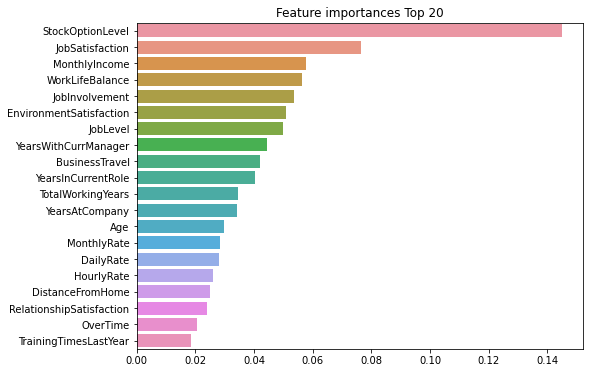

In [ ]:

%matplotlib inline
ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train_over.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y= ftr_top20.index)
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

start_time = time.time()
gb_clf=GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train_over, y_train_over)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))
print('GBM 수행 시간 : {0:.1f} 초'.format(time.time()-start_time))



GBM 정확도 : 0.8299
GBM 수행 시간 : 0.8 초


In [ ]:
params = {
    'n_estimators':[10, 500],
    'learning_rate' : [0.05,0.1]
}
gb_grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
gb_grid_cv.fit(X_train_over, y_train_over)

print('최적 하이퍼 파라미터: ', gb_grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(gb_grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits
최적 하이퍼 파라미터:  {'learning_rate': 0.1, 'n_estimators': 500}
최고 예측 정확도 : 0.8676


In [ ]:
gb_pred=gb_grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도 : {0:.4f}'.format(gb_accuracy))

GBM 정확도 : 0.8469


In [ ]:
params = gb_grid_cv.best_params_
params

{'learning_rate': 0.1, 'n_estimators': 500}

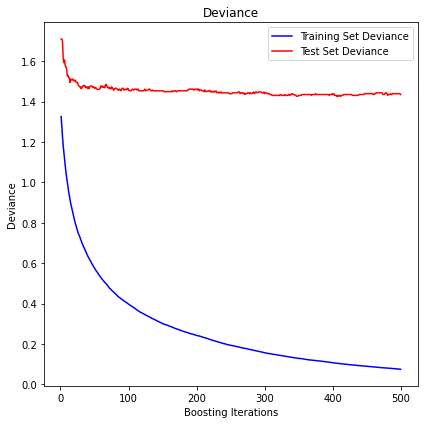

In [ ]:
# train, test deviance graph
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)
for i, y_pred in enumerate(gb_grid_cv.best_estimator_.staged_predict(X_test)):
    test_score[i] = gb_grid_cv.best_estimator_.loss_(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gb_grid_cv.best_estimator_.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()

In [ ]:
print("Train Accuracy: %.2f" %gb_grid_cv.best_estimator_.score(X_train_over,y_train_over) )
print("Test Accuracy: %.2f" %gb_grid_cv.best_estimator_.score(X_test,y_test) )

Train Accuracy: 1.00
Test Accuracy: 0.85


In [ ]:
gb_grid_cv.best_estimator_.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F979D0CA8D0)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F979D0CA8D0)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F979D0CA8D0)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F979D0CA8D0)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F979D0CA8D0)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                              random_state=RandomState(MT19937) at 0x7F979D0CA8D0)],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
       

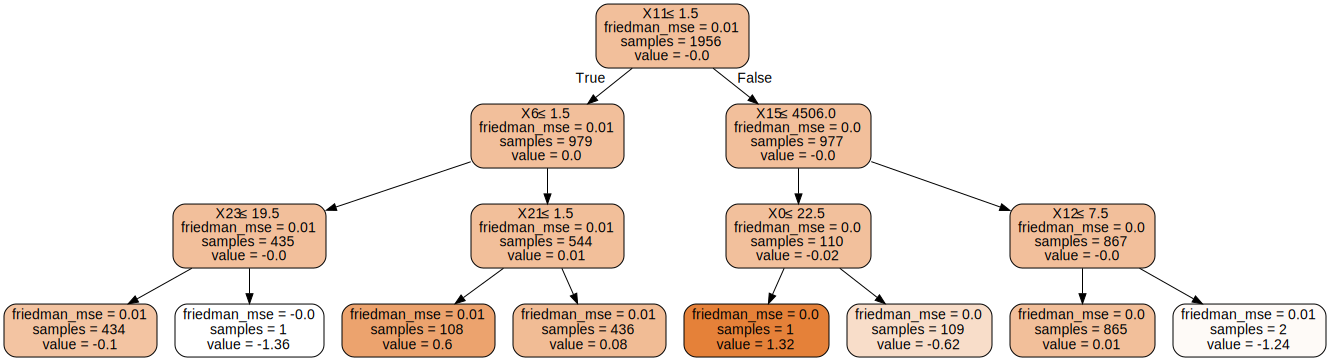

In [ ]:
# GB 중 일부 트리 graph화
estimator = gb_grid_cv.best_estimator_.estimators_[450][0]

import graphviz
from sklearn import tree

# Export as dot file
dot_data = tree.export_graphviz(estimator, 
                rounded = True, proportion = False, 
                precision = 2, filled = True,
                special_characters=True)


graph = graphviz.Source(dot_data)  
graph

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_clf.fit(X_train_over, y_train_over)
pred - knn_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('KNN 예측 정확도 : {:.4f}'.format(accuracy))

KNN 예측 정확도 : 0.8469


In [ ]:
params = {
    'n_neighbors':list(range(1,31)),
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', ' manhattan', 'minkowski']
}
knn_clf = KNeighborsClassifier()
knn_grid_cv = GridSearchCV(knn_clf, param_grid = params, cv= 3, n_jobs=-1)
knn_grid_cv.fit(X_train_over, y_train_over)

print('최적 하이퍼 파라미터: ', knn_grid_cv.best_params_)
print('최고 예측 정확도 : {0:.4f}'.format(knn_grid_cv.best_score_))

최적 하이퍼 파라미터:  {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
최고 예측 정확도 : 0.8047
